In [216]:
#Url-https://www.youtube.com/watch?v=O-O1WclwXck&list=PLBhJnyA0V0uLLhGrJTKLNYfd7_Q-8_jja&index=1&t=2340s
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [217]:
start = dt.datetime(2010,1,1)
end = dt.datetime.now()

In [101]:
stocksymbol =['ACC.NS','RELIANCE.NS','INFY.NS','TITAN.NS']
df = pdr.DataReader(stocksymbol,'yahoo',start,end)

In [102]:
numAssets = len(stocksymbol)
numAssets

4

In [103]:
'you have ' +str(numAssets) + ' assets'

'you have 4 assets'

In [104]:
def getmyportfolio(col='Adj Close'):
    data = df[col]
    return data

In [105]:
my_stocks = getmyportfolio().round()
my_stocks

Symbols,ACC.NS,RELIANCE.NS,INFY.NS,TITAN.NS
Date,,,,
2010-01-04,735.0,484.0,252.0,66.0
2010-01-05,726.0,482.0,253.0,67.0
2010-01-06,730.0,490.0,249.0,68.0
2010-01-07,735.0,498.0,244.0,70.0
2010-01-08,734.0,497.0,238.0,69.0
...,...,...,...,...
2021-10-25,2208.0,2602.0,1693.0,2379.0
2021-10-26,2236.0,2661.0,1704.0,2455.0
2021-10-27,2249.0,2627.0,1729.0,2460.0


Text(0.5, 0, 'Date')

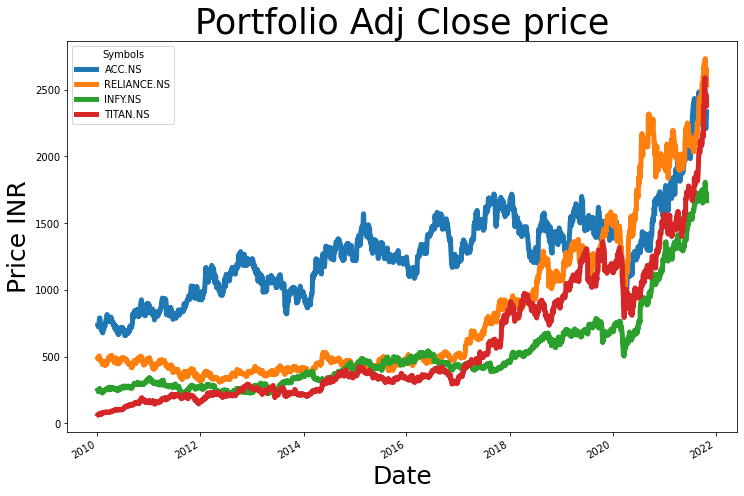

In [106]:
getmyportfolio().plot(figsize=(12,8),linewidth=5)
plt.title('Portfolio Adj Close price',fontsize=35)
plt.ylabel('Price INR',fontsize = 25)
plt.xlabel('Date',fontsize = 25)

# 1 day %age change...

In [107]:
daily_simple_returns = my_stocks.pct_change(1) # 1 is period
daily_simple_returns

Symbols,ACC.NS,RELIANCE.NS,INFY.NS,TITAN.NS
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,-0.012245,-0.004132,0.003968,0.015152
2010-01-06,0.005510,0.016598,-0.015810,0.014925
2010-01-07,0.006849,0.016327,-0.020080,0.029412
2010-01-08,-0.001361,-0.002008,-0.024590,-0.014286
...,...,...,...,...
2021-10-25,-0.001808,-0.009517,-0.007038,-0.013682
2021-10-26,0.012681,0.022675,0.006497,0.031946
2021-10-27,0.005814,-0.012777,0.014671,0.002037


In [108]:
daily_simple_returns.to_csv('./stock percnt chnge.csv')

# stock corelation

In [109]:
daily_simple_returns.corr()

Symbols,ACC.NS,RELIANCE.NS,INFY.NS,TITAN.NS
Symbols,,,,
ACC.NS,1.000000,0.323286,0.181052,0.267809
RELIANCE.NS,0.323286,1.000000,0.229630,0.277850
INFY.NS,0.181052,0.229630,1.000000,0.153143
TITAN.NS,0.267809,0.277850,0.153143,1.000000


# covariance matrix

In [110]:
daily_simple_returns.cov()

Symbols,ACC.NS,RELIANCE.NS,INFY.NS,TITAN.NS
Symbols,,,,
ACC.NS,0.000289,0.000098,0.000054,0.000098
RELIANCE.NS,0.000098,0.000321,0.000072,0.000107
INFY.NS,0.000054,0.000072,0.000307,0.000058
TITAN.NS,0.000098,0.000107,0.000058,0.000466


In [111]:
daily_simple_returns.var() #variance

Symbols
ACC.NS         0.000289
RELIANCE.NS    0.000321
INFY.NS        0.000307
TITAN.NS       0.000466
dtype: float64

In [112]:
daily_simple_returns.std() #most volatile is titan...

Symbols
ACC.NS         0.016999
RELIANCE.NS    0.017905
INFY.NS        0.017519
TITAN.NS       0.021582
dtype: float64

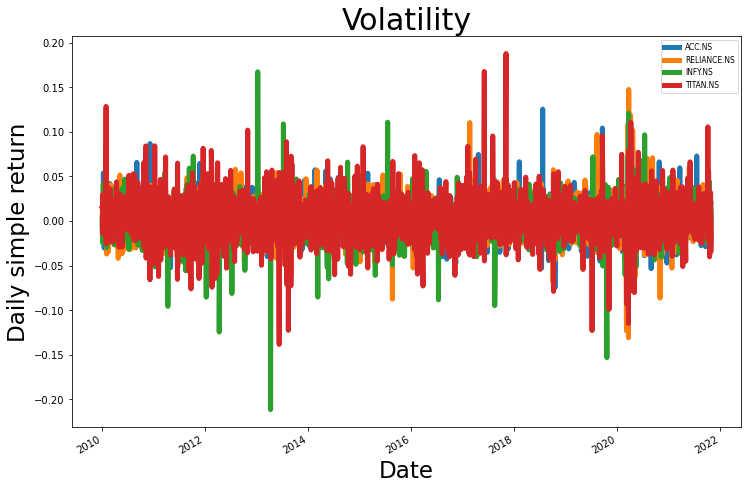

In [113]:
daily_simple_returns.plot(figsize=(12,8),linewidth=5) # daily_simple_returns['stockname'] for individual stock....
plt.ylabel('Daily simple return',fontsize = 23)
plt.xlabel('Date',fontsize = 23)
plt.title('Volatility',fontsize=30)
plt.legend(loc='upper right',fontsize=7.5)

In [114]:
mean = daily_simple_returns.mean() #the daily mean simple return
mean

Symbols
ACC.NS         0.000540
RELIANCE.NS    0.000728
INFY.NS        0.000803
TITAN.NS       0.001463
dtype: float64

In [115]:
#calculate expected portfolio daily return
randomweights =np.array([0.4,0.1,0.3,0.2])#40% ACC,10% RELIANCE,30% INFY,20% TITAN
portfolioSimpleReturn = np.sum(mean * randomweights)
'The daily expected portfolio return: '+ str(portfolioSimpleReturn)

'The daily expected portfolio return: 0.0008225061467225916'

In [116]:
#Annualised simple return
portfolioSimpleReturn * 253 #253 is no. of trading days in that year

0.2080940551208157

In [117]:
#Calculate the growth of invetsment..
dailyCummlSimplReturn = (daily_simple_returns+1).cumprod()

#show the cummulative simple returns
dailyCummlSimplReturn


Symbols,ACC.NS,RELIANCE.NS,INFY.NS,TITAN.NS
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.987755,0.995868,1.003968,1.015152
2010-01-06,0.993197,1.012397,0.988095,1.030303
2010-01-07,1.000000,1.028926,0.968254,1.060606
2010-01-08,0.998639,1.026860,0.944444,1.045455
...,...,...,...,...
2021-10-25,3.004082,5.376033,6.718254,36.045455
2021-10-26,3.042177,5.497934,6.761905,37.196970
2021-10-27,3.059864,5.427686,6.861111,37.272727


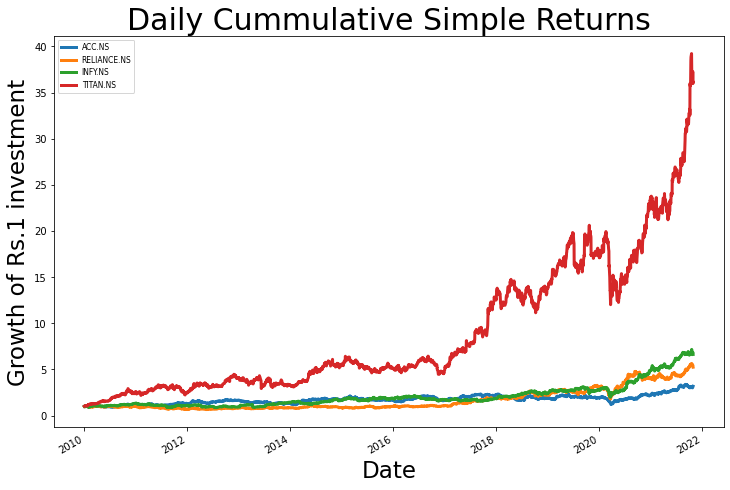

In [118]:
dailyCummlSimplReturn.plot(figsize=(12,8),linewidth=3)
plt.ylabel('Growth of Rs.1 investment',fontsize = 23)
plt.xlabel('Date',fontsize = 23)
plt.title('Daily Cummulative Simple Returns',fontsize=30)
plt.legend(loc='upper left',fontsize=7.5)
